<a href="https://colab.research.google.com/github/Slim205/Slim205/blob/main/datascience_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

datatrain = pd.read_csv('train.csv')
Xtrain = datatrain[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
Ytrain = datatrain[['Critere_temperature','Critere_chargement']].values
datatest = pd.read_csv('test.csv')
Xtest = datatest[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
Ytest = datatest[['Critere_temperature','Critere_chargement']].values


scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)
model1 = LinearRegression()

# Entraînez votre modèle sur votre training set
model1.fit(Xtrain, Ytrain)

# Faites des prédictions sur votre test set
Ypred = model1.predict(Xtest)


In [ ]:
l = (Ypred - Ytest)**2
y_reg = l.mean()
mse = mean_squared_error(Ytest, Ypred)

In [ ]:
y_reg

16.921111686219955

In [ ]:
mse

16.921111686219945

Pour choisir le nombre de couches cachées, le nombre de paramètres du modèle et les fonctions d'activation, nous allons mettre en œuvre plusieurs modèles en fixant les deux autres paramètres et en variant celui que nous souhaitons étudier. Nous utiliserons la base de données A, composée des fichiers "train.csv" et "test.csv", respectivement pour l'entraînement et la validation.

Pour évaluer les performances des modèles, nous utiliserons la méthode d'arrêt précoce (early stopping). Cette méthode nous permettra d'interrompre l'apprentissage lorsque la fonction de perte ne varie presque plus, afin d'éviter l'overfitting. Nous fixerons également le nombre maximal d'époques à 500 (parfois moins pour des raisons de visibilité des courbes) afin de contrôler le temps d'apprentissage et d'éviter un entraînement inutilement long

# Choix de la fonction d'activation


Dans cette étude, nous avons fixé le nombre de couches cachées à 3 et le nombre de paramètres du réseau à 335, afin d'analyser spécifiquement l'influence du choix de la fonction d'activation. Pour ce faire, nous avons implémenté quatre réseaux de neurones distincts :

1. Premier réseau : Ce réseau utilise exclusivement la fonction d'activation sigmoïde. La sigmoïde est couramment utilisée dans les réseaux de neurones, elle comprime les valeurs en une plage de 0 à 1, ce qui est bénéfique pour les problèmes de classification binaire.

2. Deuxième réseau : Ce réseau utilise la fonction d'activation ReLU (Rectified Linear Unit). La ReLU est populaire en raison de sa simplicité et de sa capacité à traiter efficacement les problèmes de disparition du gradient. Elle attribue une valeur de zéro aux entrées négatives et conserve les entrées positives.

3. Troisième réseau : Ce réseau utilise la fonction d'activation tangente hyperbolique (tanh). La tanh produit des sorties comprises entre -1 et 1, ce qui en fait une alternative à la sigmoïde offrant une plus grande plage de valeurs.

4. Quatrième réseau : Ce réseau présente un mélange des trois fonctions d'activation. Chaque couche cachée du réseau peut utiliser une fonction d'activation différente, ce qui permet d'explorer différentes combinaisons et d'obtenir des représentations plus complexes.

En implémentant ces quatre réseaux de neurones avec des fonctions d'activation différentes, nous pourrons comparer leurs performances respectives et déterminer quelle fonction d'activation est la plus appropriée pour notre tâche spécifique.

Epoch 1/300
10/10 [==============================] - 2s 40ms/step - loss: 234.3177 - val_loss: 249.4182
Epoch 2/300
10/10 [==============================] - 0s 14ms/step - loss: 231.3260 - val_loss: 246.3394
Epoch 3/300
10/10 [==============================] - 0s 15ms/step - loss: 228.3485 - val_loss: 243.4026
Epoch 4/300
10/10 [==============================] - 0s 10ms/step - loss: 225.5156 - val_loss: 240.6190
Epoch 5/300
10/10 [==============================] - 0s 10ms/step - loss: 222.8498 - val_loss: 237.9362
Epoch 6/300
10/10 [==============================] - 0s 10ms/step - loss: 220.3478 - val_loss: 235.3385
Epoch 7/300
10/10 [==============================] - 0s 10ms/step - loss: 217.9921 - val_loss: 232.9494
Epoch 8/300
10/10 [==============================] - 0s 10ms/step - loss: 215.6794 - val_loss: 230.7965
Epoch 9/300
10/10 [==============================] - 0s 15ms/step - loss: 213.6103 - val_loss: 228.7750
Epoch 10/300
10/10 [==============================] - 0s 10ms/st

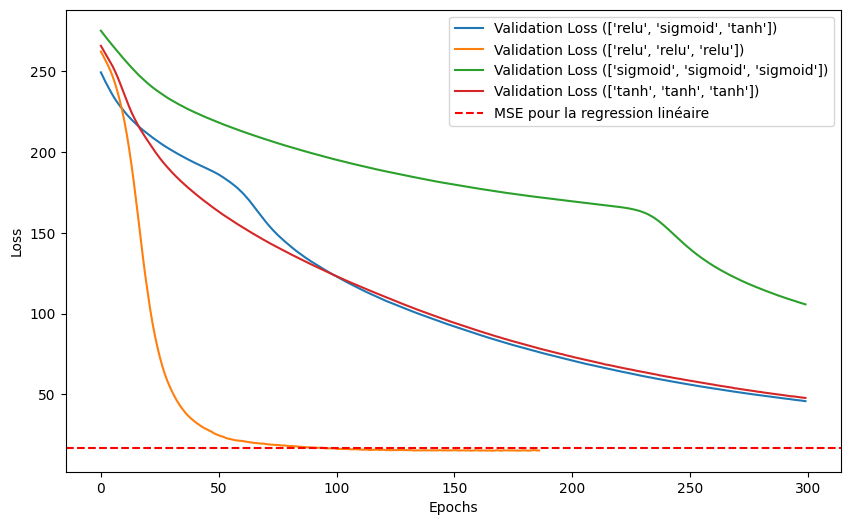

In [ ]:
datatrain = pd.read_csv('trainA.csv')
xtrain = datatrain[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
ytrain = datatrain[['Critere_temperature','Critere_chargement']].values
datatest = pd.read_csv('testA.csv')
xtest = datatest[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
ytest = datatest[['Critere_temperature','Critere_chargement']].values


scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Define a function to create and train the model
def train_model(activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation=activation[0], input_shape=(6,)),
        tf.keras.layers.Dense(16, activation=activation[1]),
        tf.keras.layers.Dense(8, activation=activation[2]),
        tf.keras.layers.Dense(2)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    early_stopping = EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True)
    history = model.fit(xtrain, ytrain, epochs=300, validation_data=(xtest, ytest), callbacks=[early_stopping])

    return history

activation_functions = [['relu', 'sigmoid', 'tanh'], ['relu']*3,['sigmoid']*3,['tanh']*3]  # Example activation functions
results = []
for activation in activation_functions:
    history = train_model(activation)
    results.append((activation, history.history))

plt.figure(figsize=(10, 6))
for activation, history in results:
    plt.plot(history['val_loss'], label=f'Validation Loss ({activation})')

plt.axhline(y=y_reg, color='r', linestyle='--',label = 'MSE pour la regression linéaire')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.title('Validation Loss for Different Activation Functions')
plt.legend()
plt.show()


Résultats :
On remarque qu'un choix de la fonction d'activation ReLU pour toutes les couches permet d'atteindre la valeur limite plus rapidement.
Uniquement le modèle avec ReLU comme choix de la fonction d'activation donne une perte inférieure à celle trouvée par la régression linéaire.
On utilisera par la suite des réseaux de neurones avec des fonctions d'activation ReLU.

# Influence du nombre du parametre :


Pour étudier l'influence du nombre de paramètres du modèle, nous avons fixé le nombre de couches cachées à 3 et choisi la fonction d'activation ReLU, en nous basant sur les résultats de la première partie. Nous avons ensuite fait varier le nombre de paramètres tout en comparant les fonctions de perte des différents modèles.

Le nombre de paramètres du modèle est déterminé en choisissant le nombre de neurones par couche. En effet, les paramètres d'un réseau sont représentés par les matrices de poids et les biais des différents neurones.

Nous avons choisi de nous intéresser uniquement aux structures suivantes : n neurones dans la première et la dernière couche, et 2n pour la couche du milieu. Nous avons fait varier n de 1 à 6.

Pour nos expérimentations, nous avons fixé le nombre d'epochs à 300, afin de permettre une convergence suffisante des modèles.
on adopte la notation suivante modèle [x,y,z] : x neurones à la première couches, y neurones à la deuxième couche et z neurones à la troisième couche  

Epoch 1/300
10/10 [==============================] - 2s 22ms/step - loss: 247.3106 - val_loss: 264.9992
Epoch 2/300
10/10 [==============================] - 0s 8ms/step - loss: 246.9717 - val_loss: 264.6257
Epoch 3/300
10/10 [==============================] - 0s 7ms/step - loss: 246.6569 - val_loss: 264.2951
Epoch 4/300
10/10 [==============================] - 0s 12ms/step - loss: 246.4011 - val_loss: 264.0034
Epoch 5/300
10/10 [==============================] - 0s 8ms/step - loss: 246.1694 - val_loss: 263.7437
Epoch 6/300
10/10 [==============================] - 0s 7ms/step - loss: 245.9528 - val_loss: 263.5049
Epoch 7/300
10/10 [==============================] - 0s 8ms/step - loss: 245.7527 - val_loss: 263.2830
Epoch 8/300
10/10 [==============================] - 0s 8ms/step - loss: 245.5696 - val_loss: 263.0754
Epoch 9/300
10/10 [==============================] - 0s 7ms/step - loss: 245.3922 - val_loss: 262.8766
Epoch 10/300
10/10 [==============================] - 0s 7ms/step - los

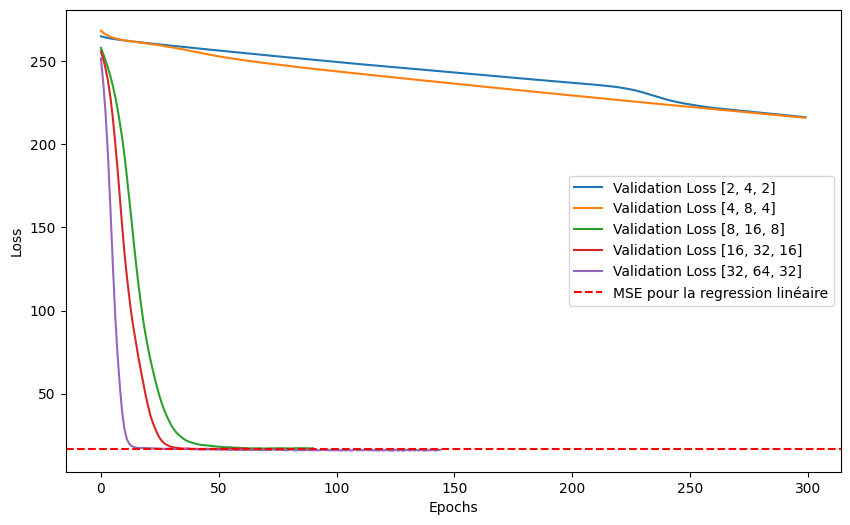

In [ ]:
datatrain = pd.read_csv('trainA.csv')
xtrain = datatrain[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
ytrain = datatrain[['Critere_temperature','Critere_chargement']].values
datatest = pd.read_csv('testA.csv')
xtest = datatest[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
ytest = datatest[['Critere_temperature','Critere_chargement']].values


scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Define a function to create and train the model
def train_model(units):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units[0], activation='relu', input_shape=(6,)),
        tf.keras.layers.Dense(units[1], activation='relu'),
        tf.keras.layers.Dense(units[2], activation='relu'),
        tf.keras.layers.Dense(2)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True)

    # Training the model with early stopping
    history = model.fit(xtrain, ytrain,epochs=300, validation_data=(xtest, ytest), callbacks=[early_stopping])

    return history

# Define different model configurations (number of units in each layer)
model_configs = [ [2**i,2**(i+1),2**i] for i in range(1,6) ]

# Train and evaluate models for different configurations
results = []
for config in model_configs:
    history = train_model(config)
    results.append((config, history.history))

# Plot the training and validation loss for each model configuration
plt.figure(figsize=(10, 6))
for config, history in results:
    label = f'[{", ".join(map(str, config))}]'
   # plt.plot(history['loss'], label=f'Train Loss {label}')
    plt.plot(history['val_loss'], label=f'Validation Loss {label}')
plt.axhline(y=y_reg, color='r', linestyle='--',label = 'MSE pour la regression linéaire')

plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.title('Validation Loss for Different Model Configurations')
plt.legend()
plt.show()


Résultats :
La loss reste constante pour toutes les configurations. Plus le modèle est complexe, plus la décroissance est rapide.

Conclusion :
Le modèle avec la configuration [2,4,2] est à rejeter, car il produit des résultats moins bons que la régression linéaire.

En revanche, les autres modèles sont presque équivalents, ce qui indique qu'il n'y a aucune raison d'augmenter le nombre de paramètres.

Nous conserverons donc le modèle avec la configuration [4,8,4] (335 paramètres).

# L'influence du nombre de sous couches

Dans cette partie, on commencer par un réseau à une couche cachée et on va augmenter à chaque itération le nombre de couche

Epoch 1/300
10/10 [==============================] - 1s 21ms/step - loss: 256.6359 - val_loss: 272.9127
Epoch 2/300
10/10 [==============================] - 0s 7ms/step - loss: 253.9010 - val_loss: 270.2061
Epoch 3/300
10/10 [==============================] - 0s 7ms/step - loss: 251.2001 - val_loss: 267.5462
Epoch 4/300
10/10 [==============================] - 0s 8ms/step - loss: 248.5461 - val_loss: 264.7321
Epoch 5/300
10/10 [==============================] - 0s 8ms/step - loss: 245.6092 - val_loss: 261.8295
Epoch 6/300
10/10 [==============================] - 0s 8ms/step - loss: 242.5129 - val_loss: 258.6070
Epoch 7/300
10/10 [==============================] - 0s 7ms/step - loss: 239.1117 - val_loss: 255.1547
Epoch 8/300
10/10 [==============================] - 0s 12ms/step - loss: 235.4564 - val_loss: 251.2579
Epoch 9/300
10/10 [==============================] - 0s 8ms/step - loss: 231.3033 - val_loss: 246.8180
Epoch 10/300
10/10 [==============================] - 0s 8ms/step - los

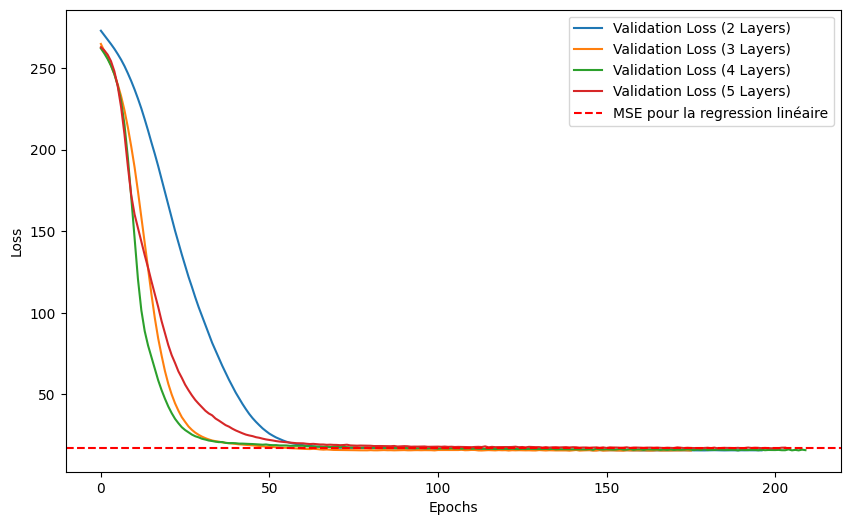

In [ ]:
datatrain = pd.read_csv('train.csv')
xtrain = datatrain[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
ytrain = datatrain[['Critere_temperature','Critere_chargement']].values
datatest = pd.read_csv('test.csv')
xtest = datatest[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
ytest = datatest[['Critere_temperature','Critere_chargement']].values



scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Define a function to create and train the model
def train_model(num_layers):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(8, activation='relu', input_shape=(6,)))

    for i in range(num_layers-1):
        model.add(tf.keras.layers.Dense(16, activation='relu'))

    model.add(tf.keras.layers.Dense(2))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True)

    # Training the model with early stopping
    history = model.fit(xtrain, ytrain, epochs=300, validation_data=(xtest, ytest), callbacks=[early_stopping])

    return history

# Define different numbers of layers to test
num_layers_list = list(range(2,6))  # Example numbers of layers
# Add more numbers of layers as desired

# Train and evaluate models for different numbers of layers
results = []
for num_layers in num_layers_list:
    history = train_model(num_layers)
    results.append((num_layers, history.history))

# Plot the training and validation loss for each number of layers
plt.figure(figsize=(10, 6))
for num_layers, history in results:
    label = f'{num_layers} Layers'
   # plt.plot(history['loss'], label=f'Train Loss ({label})')
    plt.plot(history['val_loss'], label=f'Validation Loss ({label})')
plt.axhline(y=y_reg, color='r', linestyle='--',label = 'MSE pour la regression linéaire')

plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.title('Training and Validation Loss for Different Numbers of Layers')
plt.legend()
plt.show()


On n'a pas interet à augmenter le nombre de couches cachées puisque ça n'importe que de la complexité à notre modèle !
On choisira dans la suite un réseau à 2 couches cachèes

# Réseau de neurone pour la regression :

Une fois les paramètres du modèle fixés, nous pouvons l'utiliser pour prédire la valeur du critère de température. Cependant, nous allons abandonner le jeu de données A pour la suite, car c'est avec celui-ci que nous avons choisi les paramètres du modèle. Ainsi, nous allons mettre en place un réseau de neurones à 2 couches cachées avec fonction d'activation Relu et 335 parametres.

In [ ]:
datatrain = pd.read_csv('trainB.csv')
Xtrain = datatrain[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
Ytrain = datatrain[['Critere_temperature','Critere_chargement']].values
datatest = pd.read_csv('testB.csv')
Xtest = datatest[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
Ytest = datatest[['Critere_temperature','Critere_chargement']].values

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation='relu', input_shape=(6,)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(2)
])


model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(Xtrain, Ytrain, epochs=300)



Epoch 1/300
10/10 [==============================] - 1s 3ms/step - loss: 301.9162
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 300.6450
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 299.4307
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 298.3485
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 297.2641
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 296.0976
Epoch 7/300
10/10 [==============================] - 0s 4ms/step - loss: 294.7323
Epoch 8/300
10/10 [==============================] - 0s 4ms/step - loss: 293.1187
Epoch 9/300
10/10 [==============================] - 0s 3ms/step - loss: 291.0953
Epoch 10/300
10/10 [==============================] - 0s 2ms/step - loss: 288.5335
Epoch 11/300
10/10 [==============================] - 0s 2ms/step - loss: 285.5285
Epoch 12/300
10/10 [==============================] - 0s 2ms/step - loss: 281.6342
Epoch 13/300


16/16 [==============================] - 0s 2ms/step


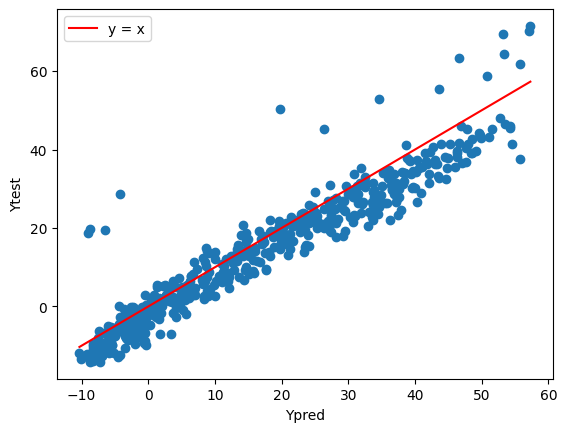

In [ ]:
Ypred_neurone = model.predict(Xtest)[:,0]
plt.scatter(Ypred_neurone,Ytest[:,0])

# Affichage de la droite y = x
x = np.linspace(min(Ypred_neurone), max(Ypred_neurone), 100)
plt.plot(x, x, color='r', label='y = x')

# Configuration de la légende et des axes
plt.legend()
plt.xlabel('Ypred')
plt.ylabel('Ytest')

# Affichage du graphique
plt.show()

In [ ]:
model.summary()

Model: "sequential_303"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1169 (Dense)          (None, 8)                 56        
                                                                 
 dense_1170 (Dense)          (None, 16)                144       
                                                                 
 dense_1171 (Dense)          (None, 8)                 136       
                                                                 
 dense_1172 (Dense)          (None, 2)                 18        
                                                                 
Total params: 354
Trainable params: 354
Non-trainable params: 0
_________________________________________________________________


16/16 [==============================] - 0s 1ms/step


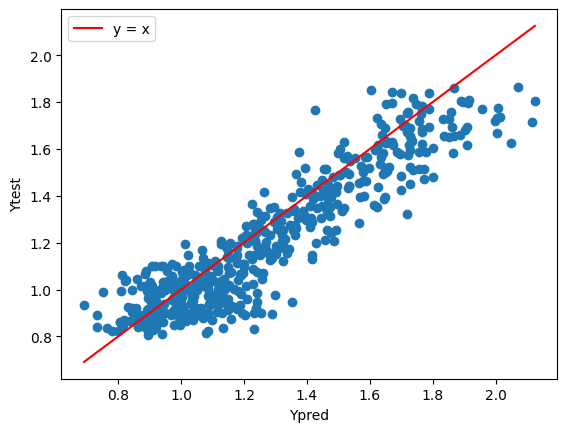

In [ ]:
Ypred_neurone = model.predict(Xtest)[:,1]
plt.scatter(Ypred_neurone,Ytest[:,1])

# Affichage de la droite y = x
x = np.linspace(min(Ypred_neurone), max(Ypred_neurone), 100)
plt.plot(x, x, color='r', label='y = x')

# Configuration de la légende et des axes
plt.legend()
plt.xlabel('Ypred')
plt.ylabel('Ytest')

# Affichage du graphique
plt.show()

on trouve l'allure d'une courbe mais ce n'est pas parfaietement

On a donc trouvé une relation linéaire indiquant que la valeur prédite est proche de la valeur souhaitée !

Le modèle implémenté semble être un bon estimateur du critère de température pour le jeu de données B. Cependant, est-ce également le cas pour les autres jeux de données ?

Nous allons comparer les performances des réseaux de neurones par rapport à celles de la régression linéaire. Pour chaque jeu de données (A, B, C, D, E), nous allons implémenter les deux modèles et les tester avec le jeu de données de test. Nous nous intéresserons à la fonction de perte quadratique et chercherons un modèle qui minimise cette perte.

Les données ont été normalisées afin de pouvoir être traitées par les réseaux de neurones. Nous avons également réalisé une régression linéaire sur les données normalisées, bien que cela ne soit pas nécessaire étant donné qu'il n'y a pas de problème de non-linéarité. Cependant, cela est utile pour comparer les deux pertes des modèles.

In [ ]:
L = ['A','B','C','D','E']
W={}
for x in L :
  datatrain = pd.read_csv('train{}.csv'.format(x))
  Xtrain = datatrain[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
  Ytrain = datatrain[['Critere_temperature','Critere_chargement']].values
  datatest = pd.read_csv('test{}.csv'.format(x))
  Xtest = datatest[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
  Ytest = datatest[['Critere_temperature','Critere_chargement']].values

  scaler = StandardScaler()
  Xtrain = scaler.fit_transform(Xtrain)
  Xtest = scaler.fit_transform(Xtest)

  model = tf.keras.Sequential([
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(2)
  ])


  model.compile(optimizer='adam', loss='mean_squared_error')

  history = model.fit(Xtrain, Ytrain, epochs=400)

  Ypred_neurone = model.predict(Xtest)
  ll = (Ypred_neurone- Ytest)**2

  model1 = LinearRegression()

  model1.fit(Xtrain, Ytrain)
  Ypred = model1.predict(Xtest)
  l1 = (Ypred - Ytest)**2
  W[x] = (ll.mean(),l1.mean())




Epoch 1/400
10/10 [==============================] - 1s 3ms/step - loss: 241.3306
Epoch 2/400
10/10 [==============================] - 0s 3ms/step - loss: 237.7867
Epoch 3/400
10/10 [==============================] - 0s 3ms/step - loss: 234.5849
Epoch 4/400
10/10 [==============================] - 0s 2ms/step - loss: 230.9581
Epoch 5/400
10/10 [==============================] - 0s 2ms/step - loss: 226.8932
Epoch 6/400
10/10 [==============================] - 0s 2ms/step - loss: 222.3739
Epoch 7/400
10/10 [==============================] - 0s 2ms/step - loss: 217.4217
Epoch 8/400
10/10 [==============================] - 0s 3ms/step - loss: 211.5827
Epoch 9/400
10/10 [==============================] - 0s 2ms/step - loss: 204.8768
Epoch 10/400
10/10 [==============================] - 0s 3ms/step - loss: 197.0252
Epoch 11/400
10/10 [==============================] - 0s 2ms/step - loss: 188.1785
Epoch 12/400
10/10 [==============================] - 0s 2ms/step - loss: 178.3816
Epoch 13/400


KeyboardInterrupt: ignored

In [ ]:
W

{'A': (16.35480168196054, 16.921111686219955),
 'B': (20.01964538450333, 17.014576167196314),
 'C': (14.553332025385236, 16.197984488809468),
 'D': (15.11215464960442, 16.67466224011099),
 'E': (16.339662754088792, 13.778445842886228)}

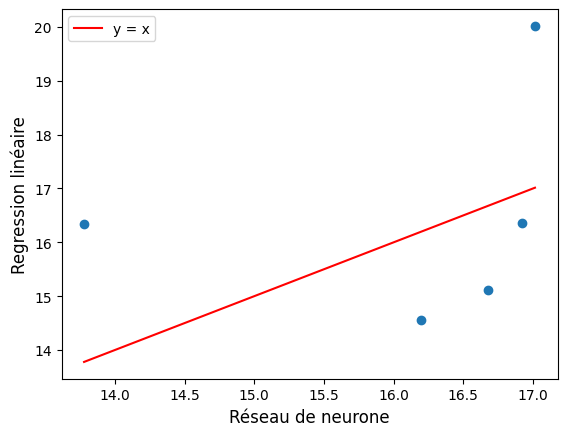

In [ ]:
A = [x[0] for x in W.values() ]
B = [x[1] for x in W.values() ]
plt.scatter(B,A)
x = np.linspace(min(B), max(B), 100)
plt.plot(x, x, color='r', label='y = x')

# Configuration de la légende et des axes
plt.legend()
plt.xlabel('Réseau de neurone',fontsize = 12)
plt.ylabel('Regression linéaire',fontsize = 12)

plt.show()

On trouve que dans la plupart des cas les résaeux de neurone sont meilleur que la regression linéaire. Ceci était le résultat lorsqu'on a réalisé l'apprentissage pour prédire les deux critères à la fois. Que ce passe til si on s'interesse uniquement à chaque critère tout seul
les figures 7 et 8 montrent le résultat en prenant la variable à predire critère de température et la figure 8 critère de chargement
On peut affirmer que pour prédire le critère de chargement les réseaux de neuorne sont mieux
pour cela on choisira les réseaux de neurones comme moyen de prédiction

In [ ]:
L = ['A','B','C','D','E']
W5={}
for x in L :
  datatrain = pd.read_csv('train{}.csv'.format(x))
  Xtrain = datatrain[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
  Ytrain = datatrain['Critere_chargement'].values
  datatest = pd.read_csv('test{}.csv'.format(x))
  Xtest = datatest[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
  Ytest = datatest['Critere_chargement'].values

  scaler = StandardScaler()
  Xtrain = scaler.fit_transform(Xtrain)
  Xtest = scaler.fit_transform(Xtest)

  model = tf.keras.Sequential([
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
  ])


  model.compile(optimizer='adam', loss='mean_squared_error')

  history = model.fit(Xtrain, Ytrain, epochs=400)

  Ypred_neurone = model.predict(Xtest)[:,0]
  ll = (Ypred_neurone- Ytest)**2

  model1 = LinearRegression()

  model1.fit(Xtrain, Ytrain)
  Ypred = model1.predict(Xtest)
  l1 = (Ypred - Ytest)**2
  W5[x] = (ll.mean(),l1.mean())




Epoch 1/400
10/10 [==============================] - 1s 3ms/step - loss: 2.4767
Epoch 2/400
10/10 [==============================] - 0s 2ms/step - loss: 1.9723
Epoch 3/400
10/10 [==============================] - 0s 2ms/step - loss: 1.5806
Epoch 4/400
10/10 [==============================] - 0s 2ms/step - loss: 1.2759
Epoch 5/400
10/10 [==============================] - 0s 2ms/step - loss: 1.0485
Epoch 6/400
10/10 [==============================] - 0s 2ms/step - loss: 0.8808
Epoch 7/400
10/10 [==============================] - 0s 3ms/step - loss: 0.7272
Epoch 8/400
10/10 [==============================] - 0s 2ms/step - loss: 0.6069
Epoch 9/400
10/10 [==============================] - 0s 3ms/step - loss: 0.5017
Epoch 10/400
10/10 [==============================] - 0s 5ms/step - loss: 0.4067
Epoch 11/400
10/10 [==============================] - 0s 3ms/step - loss: 0.3192
Epoch 12/400
10/10 [==============================] - 0s 2ms/step - loss: 0.2467
Epoch 13/400
10/10 [=================

In [ ]:
W5

{'A': (0.002781319588311704, 0.004840121046891114),
 'B': (0.0035586901433448475, 0.0051990190471910116),
 'C': (0.003627100605485543, 0.005451659491070488),
 'D': (0.002796040344628686, 0.005447062561803904),
 'E': (0.0034038668409897255, 0.005102812507511615)}

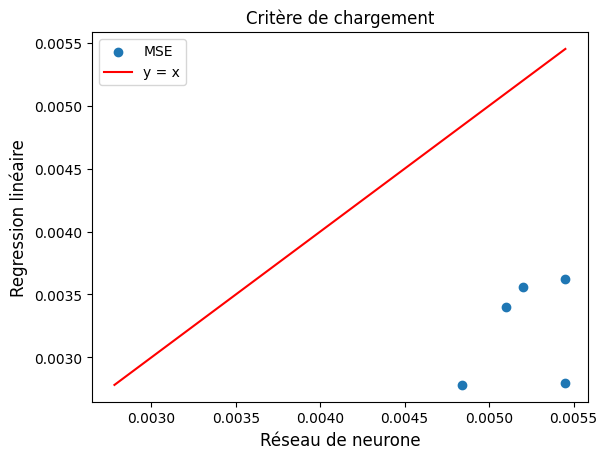

In [ ]:
A = [x[0] for x in W5.values() ]
B = [x[1] for x in W5.values() ]
plt.scatter(B,A,label = 'MSE')
x = np.linspace(min(B+A), max(B+A), 100)
plt.plot(x, x, color='r', label='y = x')

# Configuration de la légende et des axes
plt.legend()
plt.xlabel('Réseau de neurone',fontsize = 12)
plt.ylabel('Regression linéaire',fontsize = 12)
plt.title('Critère de chargement')
plt.show()

In [ ]:
L = ['A','B','C','D','E']
W6={}
for x in L :
  datatrain = pd.read_csv('train{}.csv'.format(x))
  Xtrain = datatrain[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
  Ytrain = datatrain['Critere_temperature'].values
  datatest = pd.read_csv('test{}.csv'.format(x))
  Xtest = datatest[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
  Ytest = datatest['Critere_temperature'].values

  scaler = StandardScaler()
  Xtrain = scaler.fit_transform(Xtrain)
  Xtest = scaler.fit_transform(Xtest)

  model = tf.keras.Sequential([
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
  ])


  model.compile(optimizer='adam', loss='mean_squared_error')

  history = model.fit(Xtrain, Ytrain, epochs=400)

  Ypred_neurone = model.predict(Xtest)[:,0]
  ll = (Ypred_neurone- Ytest)**2

  model1 = LinearRegression()

  model1.fit(Xtrain, Ytrain)
  Ypred = model1.predict(Xtest)
  l1 = (Ypred - Ytest)**2
  W6[x] = (ll.mean(),l1.mean())




Epoch 1/400
10/10 [==============================] - 1s 3ms/step - loss: 501.9191
Epoch 2/400
10/10 [==============================] - 0s 2ms/step - loss: 492.8687
Epoch 3/400
10/10 [==============================] - 0s 3ms/step - loss: 484.1918
Epoch 4/400
10/10 [==============================] - 0s 3ms/step - loss: 475.7577
Epoch 5/400
10/10 [==============================] - 0s 4ms/step - loss: 467.5491
Epoch 6/400
10/10 [==============================] - 0s 3ms/step - loss: 458.9850
Epoch 7/400
10/10 [==============================] - 0s 3ms/step - loss: 449.5333
Epoch 8/400
10/10 [==============================] - 0s 2ms/step - loss: 439.0212
Epoch 9/400
10/10 [==============================] - 0s 3ms/step - loss: 427.9731
Epoch 10/400
10/10 [==============================] - 0s 4ms/step - loss: 414.7338
Epoch 11/400
10/10 [==============================] - 0s 3ms/step - loss: 399.6849
Epoch 12/400
10/10 [==============================] - 0s 3ms/step - loss: 383.2106
Epoch 13/400


Les réseaux de neurones sont donc plus performants que la régression linéaire. Nous allons donc conserver le modèle de réseau de neurones comme modèle de régression. Ainsi, nous avons pu trouver une solution au problème du calcul coûteux. Les réseaux de neurones permettent d'estimer les valeurs des deux critères dans un temps de calcul raisonnable (de l'ordre de quelques minutes).

In [ ]:
W6

{'A': (31.181780427468475, 33.83738325139301),
 'B': (34.82404485073524, 34.02395331534542),
 'C': (26.01320748110019, 32.39051731812786),
 'D': (28.93740819510862, 33.34387741766017),
 'E': (27.233255800260437, 27.55178887326493)}

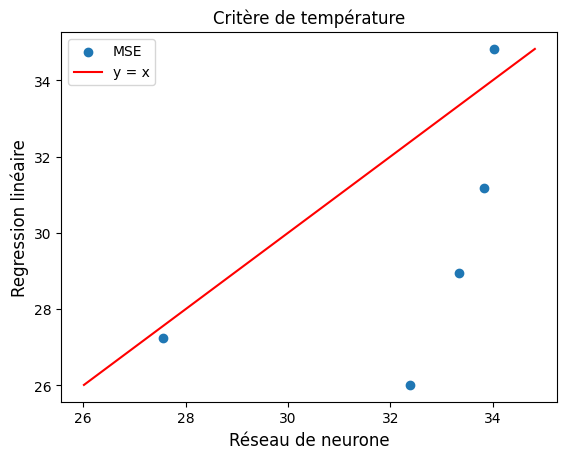

In [ ]:
A = [x[0] for x in W6.values() ]
B = [x[1] for x in W6.values() ]
plt.scatter(B,A,label ='MSE' )
x = np.linspace(min(B+A), max(B+A), 100)
plt.plot(x, x, color='r', label='y = x')

# Configuration de la légende et des axes
plt.legend()
plt.xlabel('Réseau de neurone',fontsize = 12)
plt.ylabel('Regression linéaire',fontsize = 12)
plt.title('Critère de température')
plt.show()

Comparant le résultat de ce modèle de regression à la regression lineaire

# Comparasion entre regression logistique et réseaux de neurones

# Réseau de neurone pour la classification

# comparaison entre regression logistique et réseaux de neurones :

En pratique, nous ne nous intéressons pas réellement aux valeurs des deux critères. Le but du calcul des critères est de vérifier si nous sommes dans des zones de risque ou non. Pour cela, nous utiliserons le modèle de réseaux de neurones que nous avons implémenté dans la section 3.1.2. Rappelons que ce modèle prédit la valeur des critères. C'est pourquoi nous avons transformé le résultat en une valeur binaire en utilisant la fonction indicatrice de R+ (fonction de Heaviside), puis nous avons calculé la précision. Ensuite, nous avons comparé ces résultats avec ceux de la régression logistique.

Nous avons refait ce travail sur toutes les bases de données et avons obtenu les résultats suivants : les réseaux de neurones sont plus performants que la régression logistique dans 4 cas sur 5. Par conséquent, nous choisirons les réseaux de neurones comme modèle de prédiction.

# UTILE

In [ ]:
L = ['A','B','C','D','E']
W1={}
for x in L :
  datatrain = pd.read_csv('train{}.csv'.format(x))
  Xtrain = datatrain[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
  Ytrain = datatrain['Critere_temperature'].values
  datatest = pd.read_csv('test{}.csv'.format(x))
  Xtest = datatest[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
  Ytest = datatest['Critere_temperature'].values
  ytrain = datatrain['Critere_temperature'].apply(lambda x: 1 if x > 0 else 0).values
  ytest = datatest['Critere_temperature'].apply(lambda x: 1 if x > 0 else 0).values
  scaler = StandardScaler()
  Xtrain = scaler.fit_transform(Xtrain)
  Xtest = scaler.fit_transform(Xtest)

  model = tf.keras.Sequential([
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
  ])


  model.compile(optimizer='adam', loss='mean_squared_error')

  history = model.fit(Xtrain, Ytrain, epochs=400)

  neurone_pred = model.predict(Xtest)[:,0]
  for i in range(500) :
    if neurone_pred[i] > 0:
      neurone_pred[i] =1
    else :
      neurone_pred[i] = 0
  l2 = abs(neurone_pred - ytest)
  acuracy_neurone = (1- l2.sum()/500)*100
  lr = LogisticRegression()
  lr.fit(Xtrain, ytrain)
  ypred = lr.predict(Xtest)
  W1[x] = (acuracy_neurone,  accuracy_score(ytest, ypred)*100)




Epoch 1/400
10/10 [==============================] - 1s 2ms/step - loss: 488.6249
Epoch 2/400
10/10 [==============================] - 0s 2ms/step - loss: 484.5653
Epoch 3/400
10/10 [==============================] - 0s 2ms/step - loss: 480.5431
Epoch 4/400
10/10 [==============================] - 0s 3ms/step - loss: 476.1864
Epoch 5/400
10/10 [==============================] - 0s 2ms/step - loss: 471.8813
Epoch 6/400
10/10 [==============================] - 0s 2ms/step - loss: 466.9957
Epoch 7/400
10/10 [==============================] - 0s 3ms/step - loss: 461.8417
Epoch 8/400
10/10 [==============================] - 0s 2ms/step - loss: 456.1987
Epoch 9/400
10/10 [==============================] - 0s 4ms/step - loss: 450.4397
Epoch 10/400
10/10 [==============================] - 0s 3ms/step - loss: 443.9691
Epoch 11/400
10/10 [==============================] - 0s 2ms/step - loss: 437.1457
Epoch 12/400
10/10 [==============================] - 0s 3ms/step - loss: 429.6940
Epoch 13/400


In [ ]:
W1

{'A': (96.6, 96.0),
 'B': (93.8, 92.2),
 'C': (93.6, 93.2),
 'D': (96.2, 96.0),
 'E': (95.8, 95.8)}

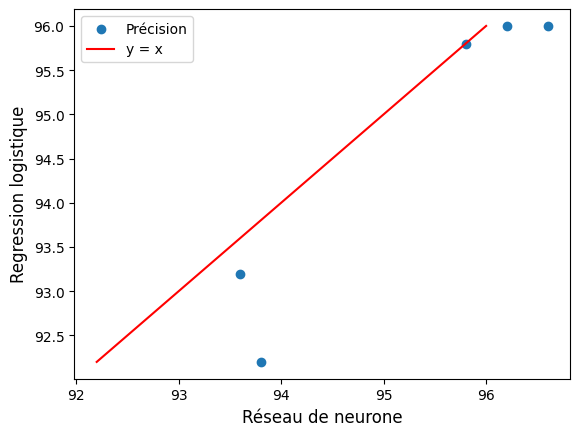

In [ ]:
A = [x[0] for x in W1.values() ]
B = [x[1] for x in W1.values() ]
plt.scatter(  A,B,label = 'Précision')
x = np.linspace(min(B), max(B), 100)
plt.plot(x, x, color='r', label='y = x')

# Configuration de la légende et des axes
plt.legend()
plt.xlabel('Réseau de neurone',fontsize = 12)
plt.ylabel('Regression logistique',fontsize = 12)

plt.show()

In [ ]:
L = ['A','B','C','D','E']
W3={}
for x in L :
  datatrain = pd.read_csv('train{}.csv'.format(x))
  Xtrain = datatrain[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
  Ytrain = datatrain['Critere_chargement'].values
  datatest = pd.read_csv('test{}.csv'.format(x))
  Xtest = datatest[['Enthalpie_R1', 'Pression_R1', 'Carac_evac_R1', 'Temperature_R2', 'Puissance_P1_R2', 'Puissance_P2_R2']].values
  Ytest = datatest['Critere_chargement'].values
  ytrain = datatrain['Critere_chargement'].apply(lambda x: 1 if x > 1 else 0).values
  ytest = datatest['Critere_chargement'].apply(lambda x: 1 if x > 1 else 0).values
  scaler = StandardScaler()
  Xtrain = scaler.fit_transform(Xtrain)
  Xtest = scaler.fit_transform(Xtest)

  model = tf.keras.Sequential([
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
  ])


  model.compile(optimizer='adam', loss='mean_squared_error')

  history = model.fit(Xtrain, Ytrain, epochs=300)

  neurone_pred = model.predict(Xtest)[:,0]
  for i in range(500) :
    if neurone_pred[i] > 1:
      neurone_pred[i] =1
    else :
      neurone_pred[i] = 0
  l2 = abs(neurone_pred - ytest)
  acuracy_neurone = (1- l2.sum()/500)*100
  lr = LogisticRegression()
  lr.fit(Xtrain, ytrain)
  ypred = lr.predict(Xtest)
  W3[x] = (acuracy_neurone,  accuracy_score(ytest, ypred)*100)




Epoch 1/300
10/10 [==============================] - 1s 2ms/step - loss: 0.7846
Epoch 2/300
10/10 [==============================] - 0s 2ms/step - loss: 0.6744
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 0.5741
Epoch 4/300
10/10 [==============================] - 0s 2ms/step - loss: 0.4861
Epoch 5/300
10/10 [==============================] - 0s 2ms/step - loss: 0.4055
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 0.3315
Epoch 7/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2704
Epoch 8/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2185
Epoch 9/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1804
Epoch 10/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1543
Epoch 11/300
10/10 [==============================] - 0s 3ms/step - loss: 0.1334
Epoch 12/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1181
Epoch 13/300
10/10 [=================

In [ ]:
W3

{'A': (94.6, 97.0),
 'B': (95.8, 92.60000000000001),
 'C': (95.0, 92.60000000000001),
 'D': (88.2, 95.6),
 'E': (95.0, 96.2)}

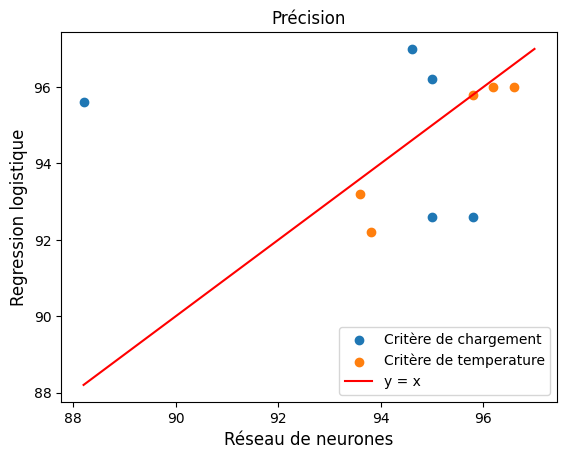

In [ ]:
A = [x[0] for x in W3.values() ]
B = [x[1] for x in W3.values() ]

C = [x[0] for x in W1.values() ]
D = [x[1] for x in W1.values() ]
plt.scatter(  A,B,label = 'Critère de chargement')
plt.scatter(  C,D,label = 'Critère de temperature')
x = np.linspace(min(B+A+C+D), max(B+A+C+D), 100)
plt.plot(x, x, color='r', label='y = x')

# Configuration de la légende et des axes
plt.legend()
plt.xlabel('Réseau de neurones',fontsize = 12)
plt.ylabel('Regression logistique',fontsize = 12)
plt.title('Précision')
plt.show()